In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: style settings for cleaner visuals
sns.set(style='whitegrid')

In [10]:
# Load the Titanic dataset
df = pd.read_csv('../data/train.csv')

# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Check structure
df.info()

# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Fill missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

# Check again
df.isnull().sum()

C:\Users\91706\AppData\Local\Temp\ipykernel_8028\2315351771.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\91706\AppData\Local\Temp\ipykernel_8028\2315351771.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Text(0.5, 1.0, 'Age Distribution')

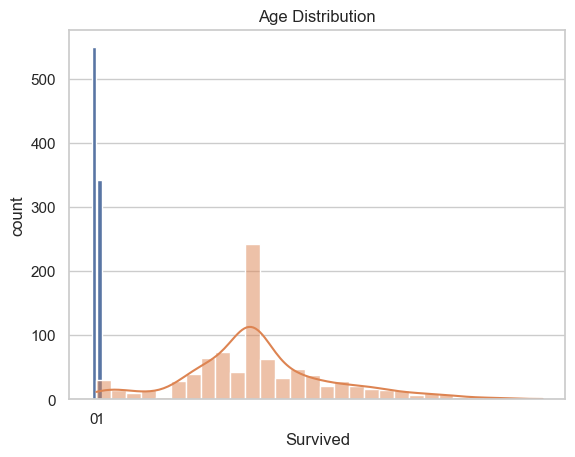

In [13]:
# Plot survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

# Plot distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

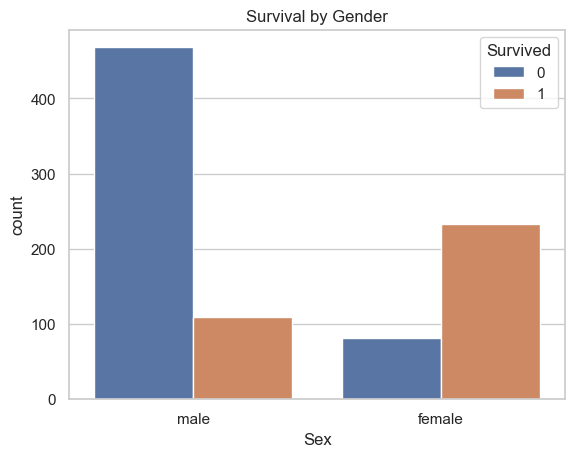

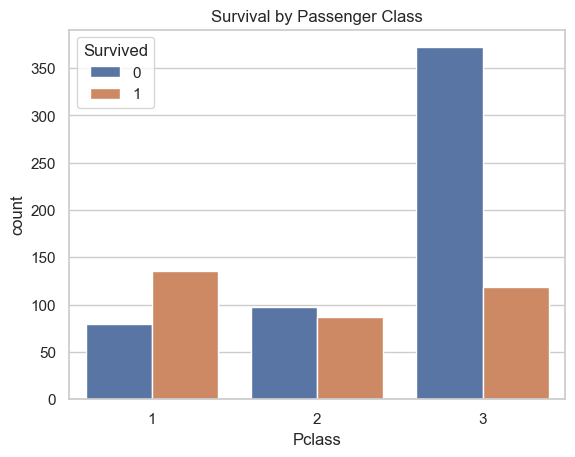

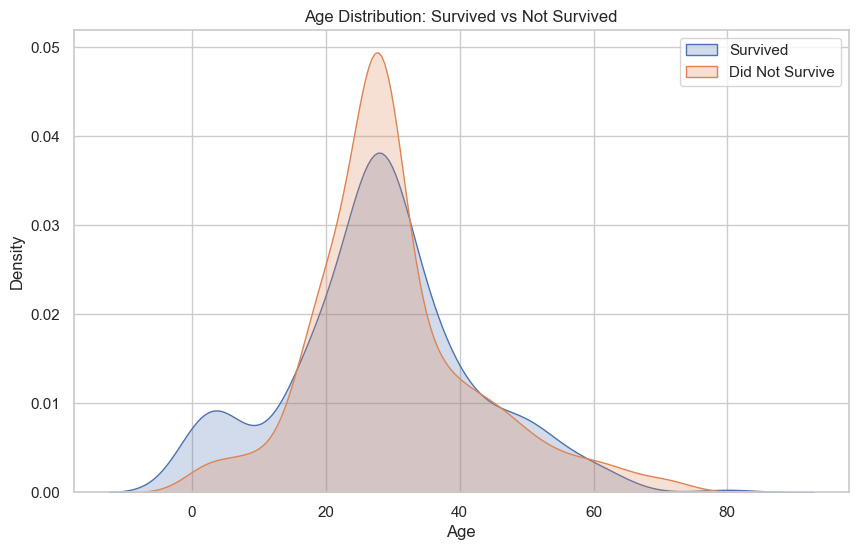

In [15]:
# Survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Age distribution by survival (updated for pandas 2.x+ safe style)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', fill=True)
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Did Not Survive', fill=True)
plt.legend()
plt.title('Age Distribution: Survived vs Not Survived')
plt.show()

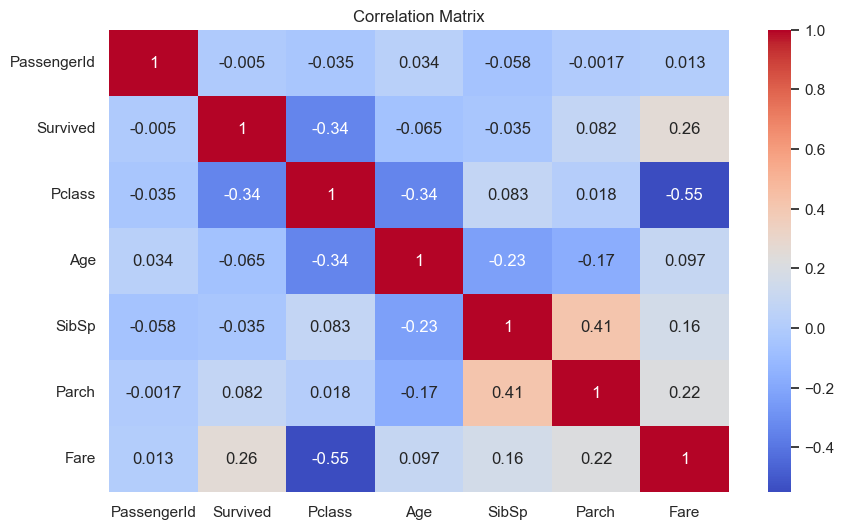

In [17]:
# Correlation matrix
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')  # Only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

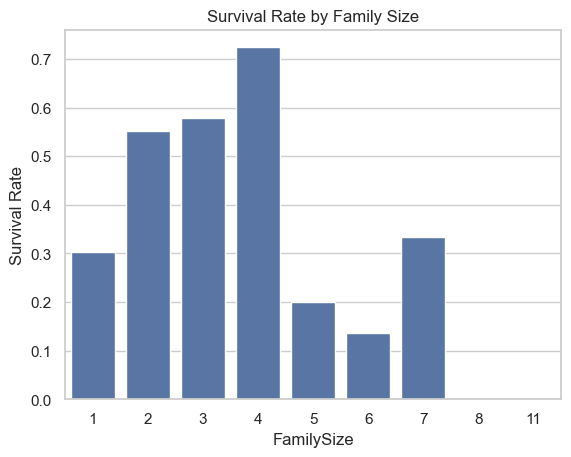

In [18]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Grouped survival rate by FamilySize
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()

# Plot
sns.barplot(x='FamilySize', y='Survived', data=family_survival)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\91706\AppData\Local\Temp\ipykernel_8028\777634397.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareBin')['Survived'].mean().reset_index()


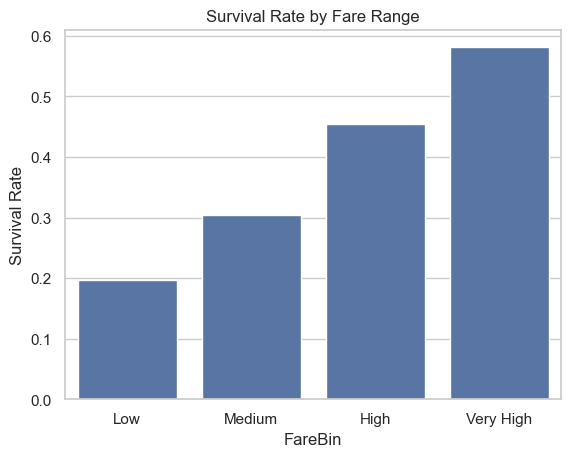

In [19]:
# Create Fare Bins
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Grouped survival rate by FareBin
fare_survival = df.groupby('FareBin')['Survived'].mean().reset_index()

# Plot
sns.barplot(x='FareBin', y='Survived', data=fare_survival)
plt.title('Survival Rate by Fare Range')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\91706\titanic-eda\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


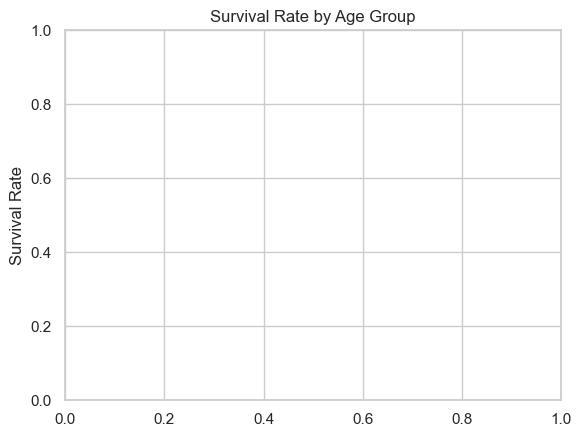

In [30]:
# Ensure 'Age' is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].median())

# Age bins
df['AgeBin'] = pd.cut(
    df['Age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)

# Group and plot
age_survival = df.groupby('AgeBin', observed=True)['Survived'].mean().reset_index()

sns.barplot(x='AgeBin', y='Survived', data=age_survival)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()


In [31]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


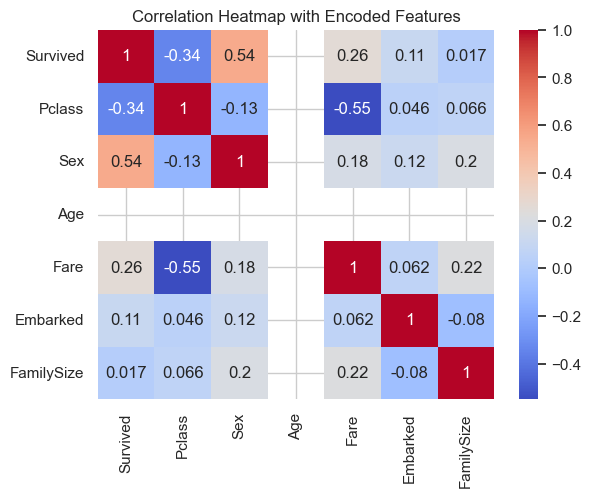

In [32]:
# Heatmap including categorical data
encoded_df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Encoded Features')
plt.show()

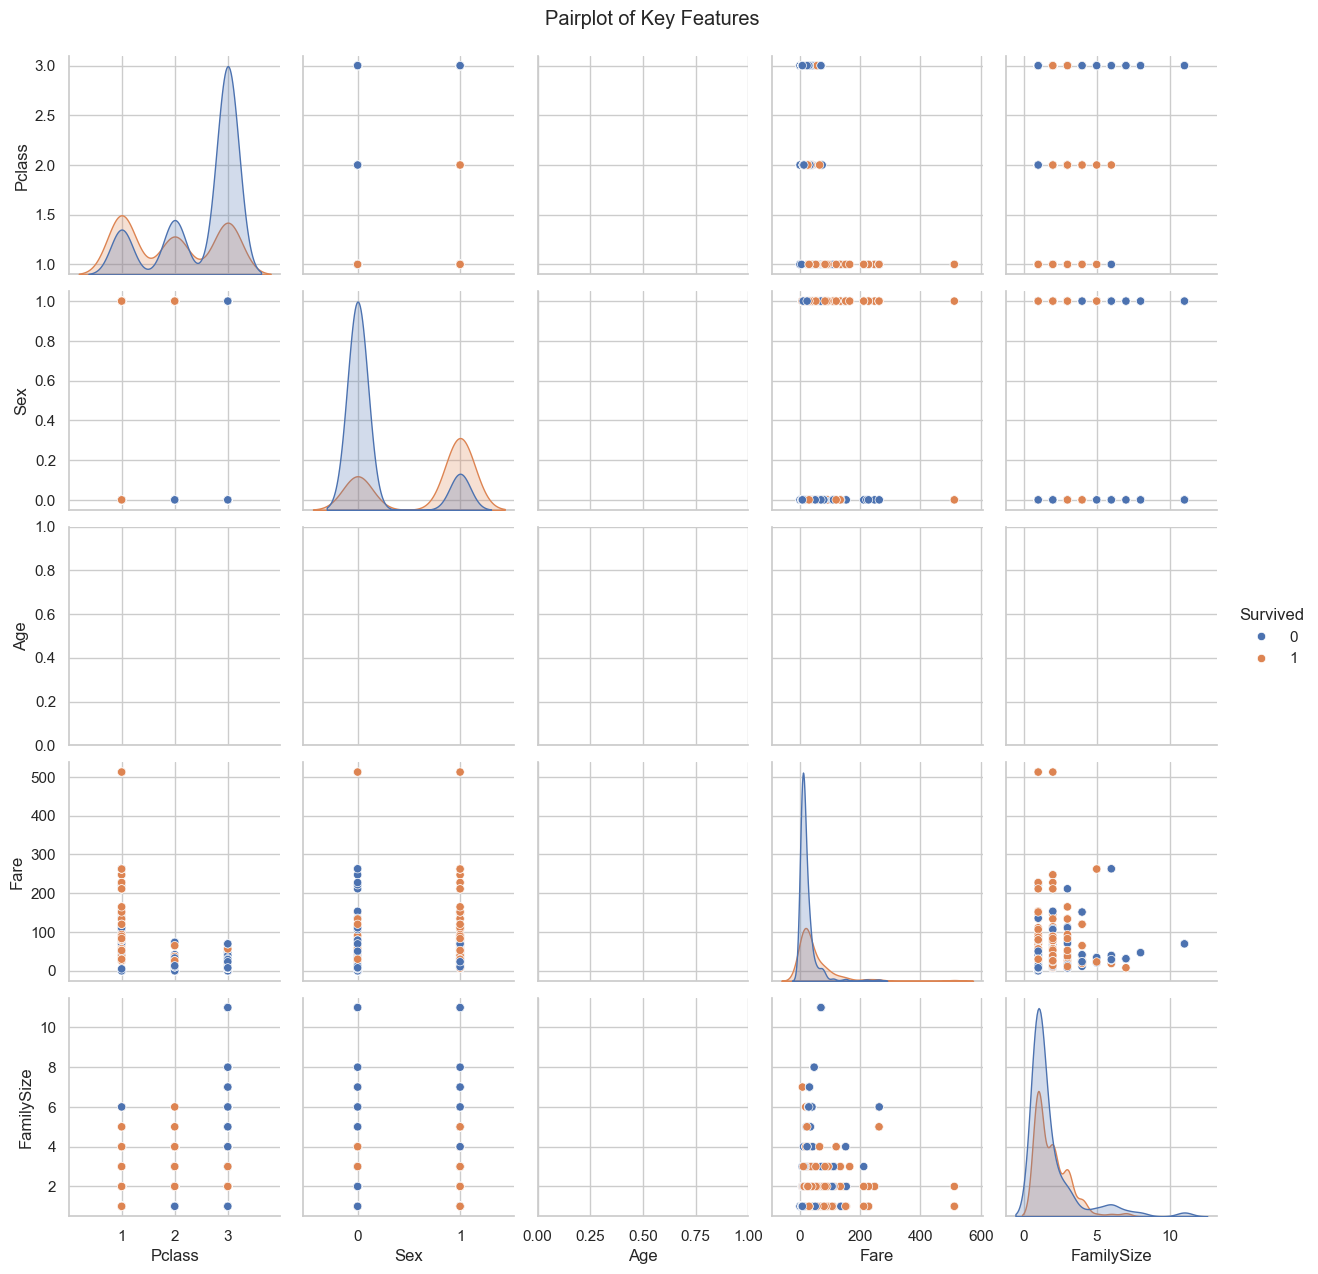

In [33]:
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']], hue='Survived')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

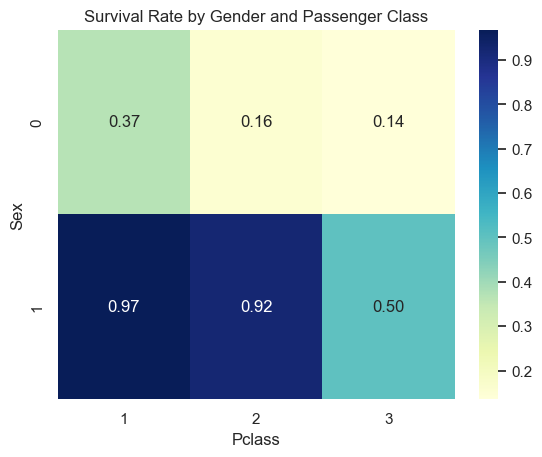

In [34]:
pivot = df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Survival Rate by Gender and Passenger Class')
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\91706\AppData\Local\Temp\ipykernel_8028\3754565055.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)


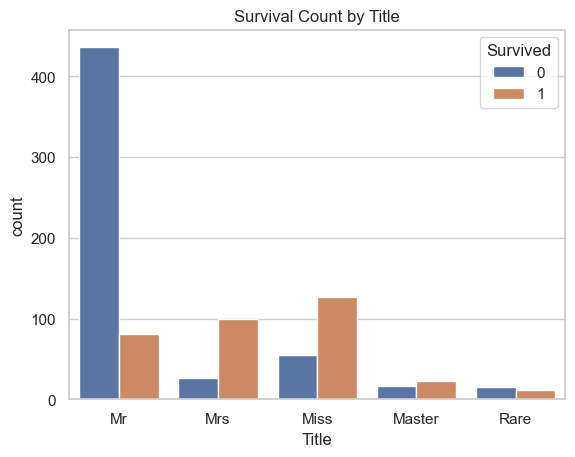

In [35]:
# Extract Title
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Clean rare titles
rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Optional: Map common titles
title_map = {'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master', 'Rare': 'Rare'}
df['Title'] = df['Title'].map(title_map)

# Plot survival by title
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survival Count by Title')
plt.show()